In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

C:\Users\Aidan\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


SyntaxError: invalid or missing encoding declaration for 'C:\\Users\\Aidan\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\python\\framework\\importer.py' (<string>)

In [ ]:
from keras.datasets import mnist

In [5]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [11]:
print('train data = ',len(x_train_image))
print(' test data = ',len(x_test_image))


train data =  60000
 test data =  10000


In [12]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

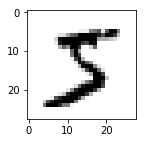

In [18]:
plot_image(x_train_image[0])

In [23]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num =10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx+i],cmap='binary')
        title="label=" + str(labels[idx+i])
        if len(prediction)>0:
            title +=', predict=' + str(prediction[idx+i])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

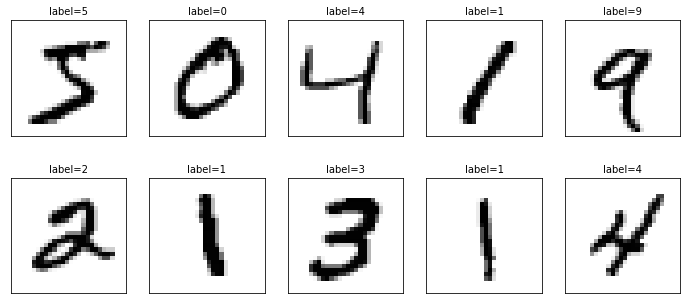

In [24]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

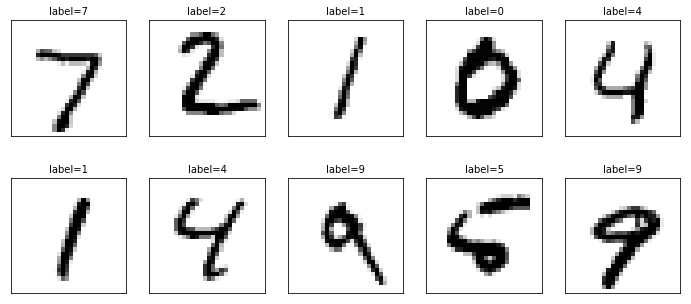

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [28]:
print('x_train_image:',x_train_image.shape)
print('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [64]:
x_train = x_train_image.reshape(60000,784).astype('float32') /255

In [65]:
x_test = x_test_image.reshape(10000,784).astype('float32')/255

In [32]:
y_train_label_one_hot = np_utils.to_categorical(y_train_label)
y_test_label_one_hot = np_utils.to_categorical(y_test_label)

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [90]:
model = Sequential()

In [91]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [92]:
model.add(Dropout(0.5))

In [93]:
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))

In [94]:
model.add(Dropout(0.5))

In [95]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [96]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [98]:
train_history=model.fit(x=x_train,y=y_train_label_one_hot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.3700 - acc: 0.8851 - val_loss: 0.1378 - val_acc: 0.9573
Epoch 2/10
 - 11s - loss: 0.1629 - acc: 0.9503 - val_loss: 0.1008 - val_acc: 0.9691
Epoch 3/10
 - 11s - loss: 0.1203 - acc: 0.9620 - val_loss: 0.0856 - val_acc: 0.9736
Epoch 4/10
 - 11s - loss: 0.0965 - acc: 0.9693 - val_loss: 0.0892 - val_acc: 0.9745
Epoch 5/10
 - 11s - loss: 0.0848 - acc: 0.9741 - val_loss: 0.0820 - val_acc: 0.9768
Epoch 6/10
 - 11s - loss: 0.0743 - acc: 0.9767 - val_loss: 0.0744 - val_acc: 0.9778
Epoch 7/10
 - 11s - loss: 0.0665 - acc: 0.9785 - val_loss: 0.0769 - val_acc: 0.9784
Epoch 8/10
 - 11s - loss: 0.0600 - acc: 0.9805 - val_loss: 0.0753 - val_acc: 0.9781
Epoch 9/10
 - 11s - loss: 0.0542 - acc: 0.9826 - val_loss: 0.0814 - val_acc: 0.9774
Epoch 10/10
 - 11s - loss: 0.0527 - acc: 0.9823 - val_loss: 0.0733 - val_acc: 0.9788


In [46]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

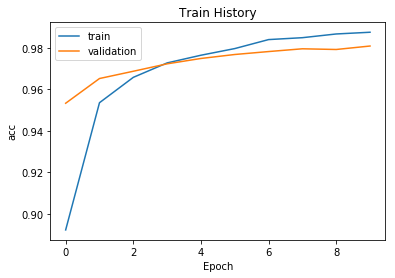

In [88]:
show_train_history(train_history,'acc','val_acc')

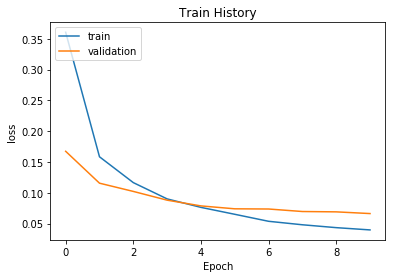

In [89]:
show_train_history(train_history,'loss','val_loss')

In [71]:
scores = model.evaluate(x_test,y_test_label_one_hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 62us/step

accuracy= 0.9742


In [72]:
prediction = model.predict_classes(x_test)

In [73]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

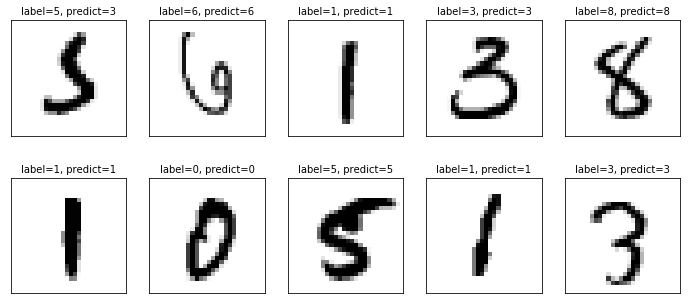

In [74]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [76]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'],colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,0,2,2,0,2,3,1,3,0
1,0,1125,4,0,0,2,2,0,2,0
2,2,1,1005,2,2,0,3,5,11,1
3,0,0,9,978,1,5,0,5,10,2
4,0,1,6,0,966,0,3,1,0,5
5,2,0,0,15,1,859,4,0,7,4
6,4,2,1,1,4,7,936,1,2,0
7,1,4,8,3,1,3,0,1000,3,5
8,2,0,8,8,3,5,2,2,941,3


In [77]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [78]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
2035,5,3
2526,5,3
2545,5,3
2810,5,3
3117,5,3
3902,5,3


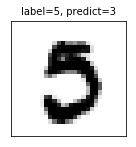

In [79]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=2810,num=1)